Social Network Analysis - Part 1 - Example 4

This guide can help you start working with NetworkX package.

In this exercise, we will create a graph & compute:
  - Degree Centrality
  - Closeness Centrality
  - Eigenvector Centrality
  - Betweenness Centrality

Ref: https://networkx.github.io/documentation/stable/tutorial.html

In [1]:
# Import packages
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# ### Creating a graph
#
# Create an empty graph with no nodes and no edges.

# By definition, a `Graph` is a collection of nodes (vertices) along with
# identified pairs of nodes (called edges, links, etc).

G = nx.Graph()

In [3]:
# Adding new nodes

G.add_node("Alice")
G.add_node("Bob")

# Or, if you have a list of node names in a List, you can specify the list:
G.add_nodes_from(["Cindy", "David", "Eleanor", "Frank", "Gina", "Henry", "Ice", "John"])

In [4]:
# # Edges
#
# `G` can also be grown by adding one edge at a time,

G.add_edge("Alice", "Bob", color='r', weight=2)

e = ("Bob", "Cindy")
G.add_edge(*e, color='r', weight=2)  # unpack edge tuple*

# by adding a list of edges,
G.add_edges_from([ 
    ("Alice", "Cindy"), ("Cindy", "David"), ("David", "Eleanor"), ("Eleanor", "Frank"), ("David", "Frank"),
    ("Cindy", "Gina"), ("Cindy", "Henry"), ("Cindy", "Ice"), ("Cindy", "John")
    ]
    , color='r', weight=2
)

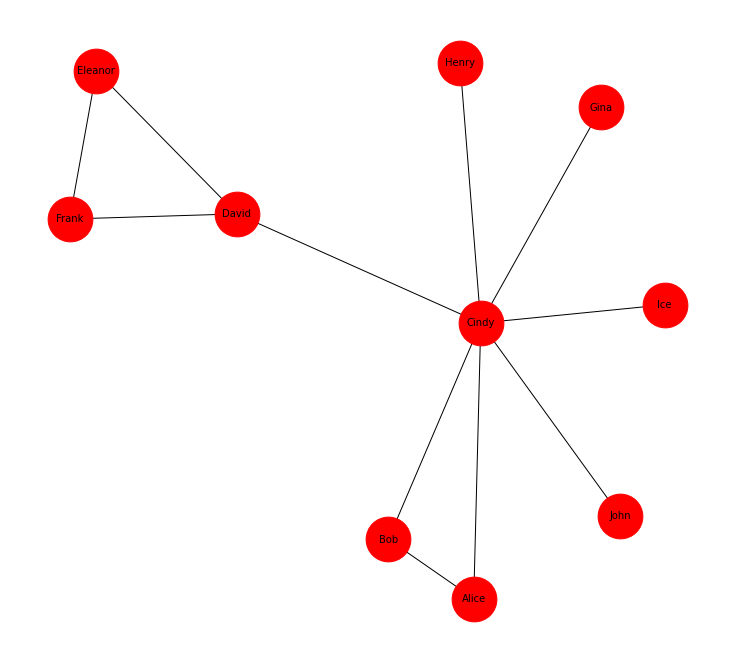

In [5]:
# Draw
plt.figure(figsize = (10,9))
nx.draw(G, with_labels=True, node_size=2000, node_color='r', font_size=10)
plt.show()

# If you want to save the graph as an image file
#plt.savefig("mygraph1.png", format = "png", dpi = 300)

In [6]:
# Network statistics

print("Number of nodes in G: ", G.number_of_nodes())
print("Number of edges in G: ", G.number_of_edges())

Number of nodes in G:  10
Number of edges in G:  11


In [7]:
# Compute Nodes' Degree Centrality (Non-Normalized)
d = nx.degree(G)
print(d)

[('Alice', 2), ('Bob', 2), ('Cindy', 7), ('David', 3), ('Eleanor', 2), ('Frank', 2), ('Gina', 1), ('Henry', 1), ('Ice', 1), ('John', 1)]


In [8]:
# Compute Nodes' Degree Centrality (Normalized)
# Computation is:
#    degree centrality (nx.degree) DIVIDED BY (N - 1)
#    WHERE
#    N is the size of the network (or NUMBER OF NODES in a network)
#
# In this case, our network has 10 nodes.
# Alice's degree centrality is 2.
# Alice's "normalized" degree centrality is 2 DIVIDED BY (10 - 1) --> 2 DIVIDED BY 9 = 0.22222...
#
# When we compare two networks of different sizes (one is much bigger than the other one),
# we tend to normalize centrality values - so that comparison is apple-to-apple.
#

d_normalized = nx.degree_centrality(G)
print(d_normalized)

{'Alice': 0.2222222222222222, 'Bob': 0.2222222222222222, 'Cindy': 0.7777777777777777, 'David': 0.3333333333333333, 'Eleanor': 0.2222222222222222, 'Frank': 0.2222222222222222, 'Gina': 0.1111111111111111, 'Henry': 0.1111111111111111, 'Ice': 0.1111111111111111, 'John': 0.1111111111111111}


In [9]:
# Compute Nodes' Closeness Centrality
c = nx.closeness_centrality(G)
print(c)

{'Alice': 0.5, 'Bob': 0.5, 'Cindy': 0.8181818181818182, 'David': 0.6, 'Eleanor': 0.4090909090909091, 'Frank': 0.4090909090909091, 'Gina': 0.47368421052631576, 'Henry': 0.47368421052631576, 'Ice': 0.47368421052631576, 'John': 0.47368421052631576}


In [14]:
# Compute Nodes' Eigenvector Centrality
i = nx.eigenvector_centrality(G)
print(i)

{'Alice': 0.33229490520175753, 'Bob': 0.33229490520175753, 'Cindy': 0.6412649895282274, 'David': 0.33868527461997244, 'Eleanor': 0.1755054053840402, 'Frank': 0.1755054053840402, 'Gina': 0.2188763322499908, 'Henry': 0.2188763322499908, 'Ice': 0.2188763322499908, 'John': 0.2188763322499908}


In [10]:
# Compute Nodes' Betweenness Centrality (Non-Normalized)
b = nx.betweenness_centrality(G, normalized=False)
print(b)

{'Alice': 0.0, 'Bob': 0.0, 'Cindy': 32.0, 'David': 14.0, 'Eleanor': 0.0, 'Frank': 0.0, 'Gina': 0.0, 'Henry': 0.0, 'Ice': 0.0, 'John': 0.0}


In [11]:
# Compute Nodes' Betweenness Centrality (Normalized)
b = nx.betweenness_centrality(G, normalized=True)
print(b)

{'Alice': 0.0, 'Bob': 0.0, 'Cindy': 0.8888888888888888, 'David': 0.38888888888888884, 'Eleanor': 0.0, 'Frank': 0.0, 'Gina': 0.0, 'Henry': 0.0, 'Ice': 0.0, 'John': 0.0}


Normalized Betweenness Centrality? WHAT is it? and WHY?

If normalized=True, then the betweenness values are normalized by

  2 / ((n-1)(n-2))   for un-directed networks
  1 / ((n-1)(n-2))   for directed networks

WHERE
  n is the number of nodes in a network (a.k.a. Network/Graph Size)


Again, the reason we might want to normalize betweenness centrality is -
In case we have two networks of DIFFERENT size (one is bigger than the other),
we can compare nodes (from two different networks) apple-to-apple.


In [12]:
'''
Troubleshooting NetworkX

Ref: https://stackoverflow.com/questions/16566871/node-size-dependent-on-the-node-degree-on-networkx

If you've already added the nodes to your graph using something like

G.add_nodes_from(nodes),

then I found that d = nx.degree(G) may not return the degrees in the same order as your nodes.

'''
c = [(c[node]) for node in G.nodes()]
print(c)

[0.5, 0.5, 0.8181818181818182, 0.6, 0.4090909090909091, 0.4090909090909091, 0.47368421052631576, 0.47368421052631576, 0.47368421052631576, 0.47368421052631576]


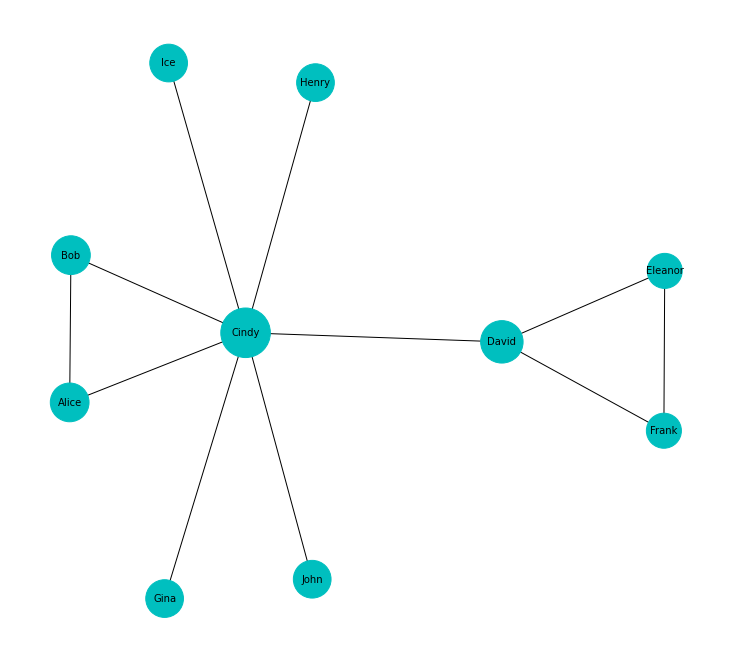

In [13]:
# Let's draw this network such that:
# High closeness centrality nodes appear bigger in size
plt.figure(figsize = (10,9))

nx.draw(G, with_labels=True, node_color='c', font_size=10,
        node_size=[v * 3000 for v in c])
plt.show()